<h1><center>Data Exploration - Medical Device Failure </center></h1>

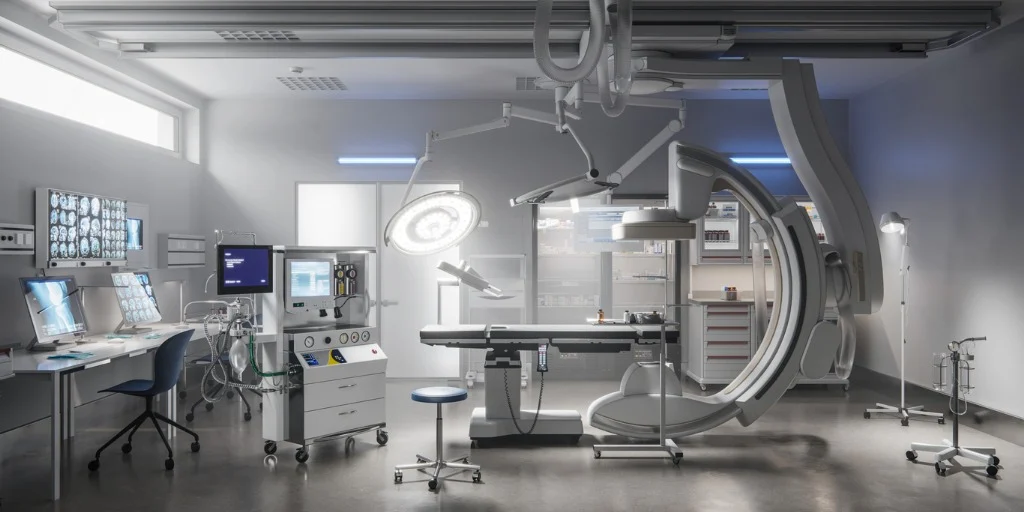

## Problem Statement

Non-routine quality events, like material failures, cost the medical device industry between US$ 3billion per year on average.

Materials-related issues are responsible for  >30% of medical device failures,
In 2017, about 35% of medical device failures reported to the Food and Drug Administration (FDA) were materials-related, another 5% was due to electronic failures. A medical device material failure makes them prone to errors and this can be traced back to the materials used to develop the medical device.Many medical devices can be affected by a material failure, and failure can during the course of a medical device lifecycle.

In addition to financial losses, material failures can lead to:

- Litigation and judgments
- Product recalls
- Failed regulatory requirements
- Warranty claims
- Lost inventory
- Lost future sales
- Reputational damage

Material failures are costly at any point in the product life cycle, but the consequences get more and more costly the further along the product is. Early design changes cost less than redesigning a product in the late development stage, but both of those are far less costly than a post-market failure.

### Objective

-  Run a descriptive analysis to gain preliminary insights in medical device failure

### Data Glossary

The data contains the different features of this medical device.

- **Device_Failure** : No failure (N), Failure (Yes)  [Target Variable]

- **Gear_Type** : There are 4 Gear Types T, X, Y,and Z   [Categorical]

- **Velocity**: Internal velocity of rotor measure in rpm [Continuous]

- **Torque(Nm)** : device spindle measured in Nm [Continuous]

- **Wear_Measure**: Wear measure in micrometers [Continuous]

- **Sensor_1**: Proprietary Resitive Sensor (upper) [Continuous]

- **Sensor_2** : Proprietary Resitive Sensor (Lower) [Continuous]





### Importing the necessary libraries

In [59]:
# Libraries to help with reading and manipulating data
import pandas as pd
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)
# setting the precision of floating numbers to 3 decimal points
pd.set_option("display.float_format", lambda x: "%.3f" % x)
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


###Loading the dataset

In [60]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df_main = pd.read_csv("/content/drive/MyDrive/Previous_Projects/medical_device_failure.csv")

# copying data to another variable to avoid any changes to original data
data = df_main.copy()

### Overview of the dataset

In [62]:
data.head()

,Device_Fail,Gear_Type,Velocity,Torque(Nm),Wear_Measure,Sensor_1,Sensor_2
0,N,X,1837.000,28.400,34.000,298.200,324.481
1,N,Z,1667.000,29.900,75.000,300.200,325.963
2,N,Z,1567.000,36.500,72.000,300.400,328.556
3,N,Z,1619.000,40.100,45.000,298.000,324.111
4,N,Z,1555.000,34.200,185.000,302.200,332.630


### Check Dimension of the Dataset

In [63]:
data.shape

(10000, 7)

### Check Data Type

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Device_Fail   10000 non-null  object 
 1   Gear_Type     10000 non-null  object 
 2   Velocity      9992 non-null   float64
 3   Torque(Nm)    9996 non-null   float64
 4   Wear_Measure  9992 non-null   float64
 5   Sensor_1      9997 non-null   float64
 6   Sensor_2      9992 non-null   float64
dtypes: float64(5), object(2)
memory usage: 547.0+ KB


 ### Check for missing values and fix missing values

In [65]:
data.isnull().sum()

Device_Fail     0
Gear_Type       0
Velocity        8
Torque(Nm)      4
Wear_Measure    8
Sensor_1        3
Sensor_2        8
dtype: int64

<Axes: >

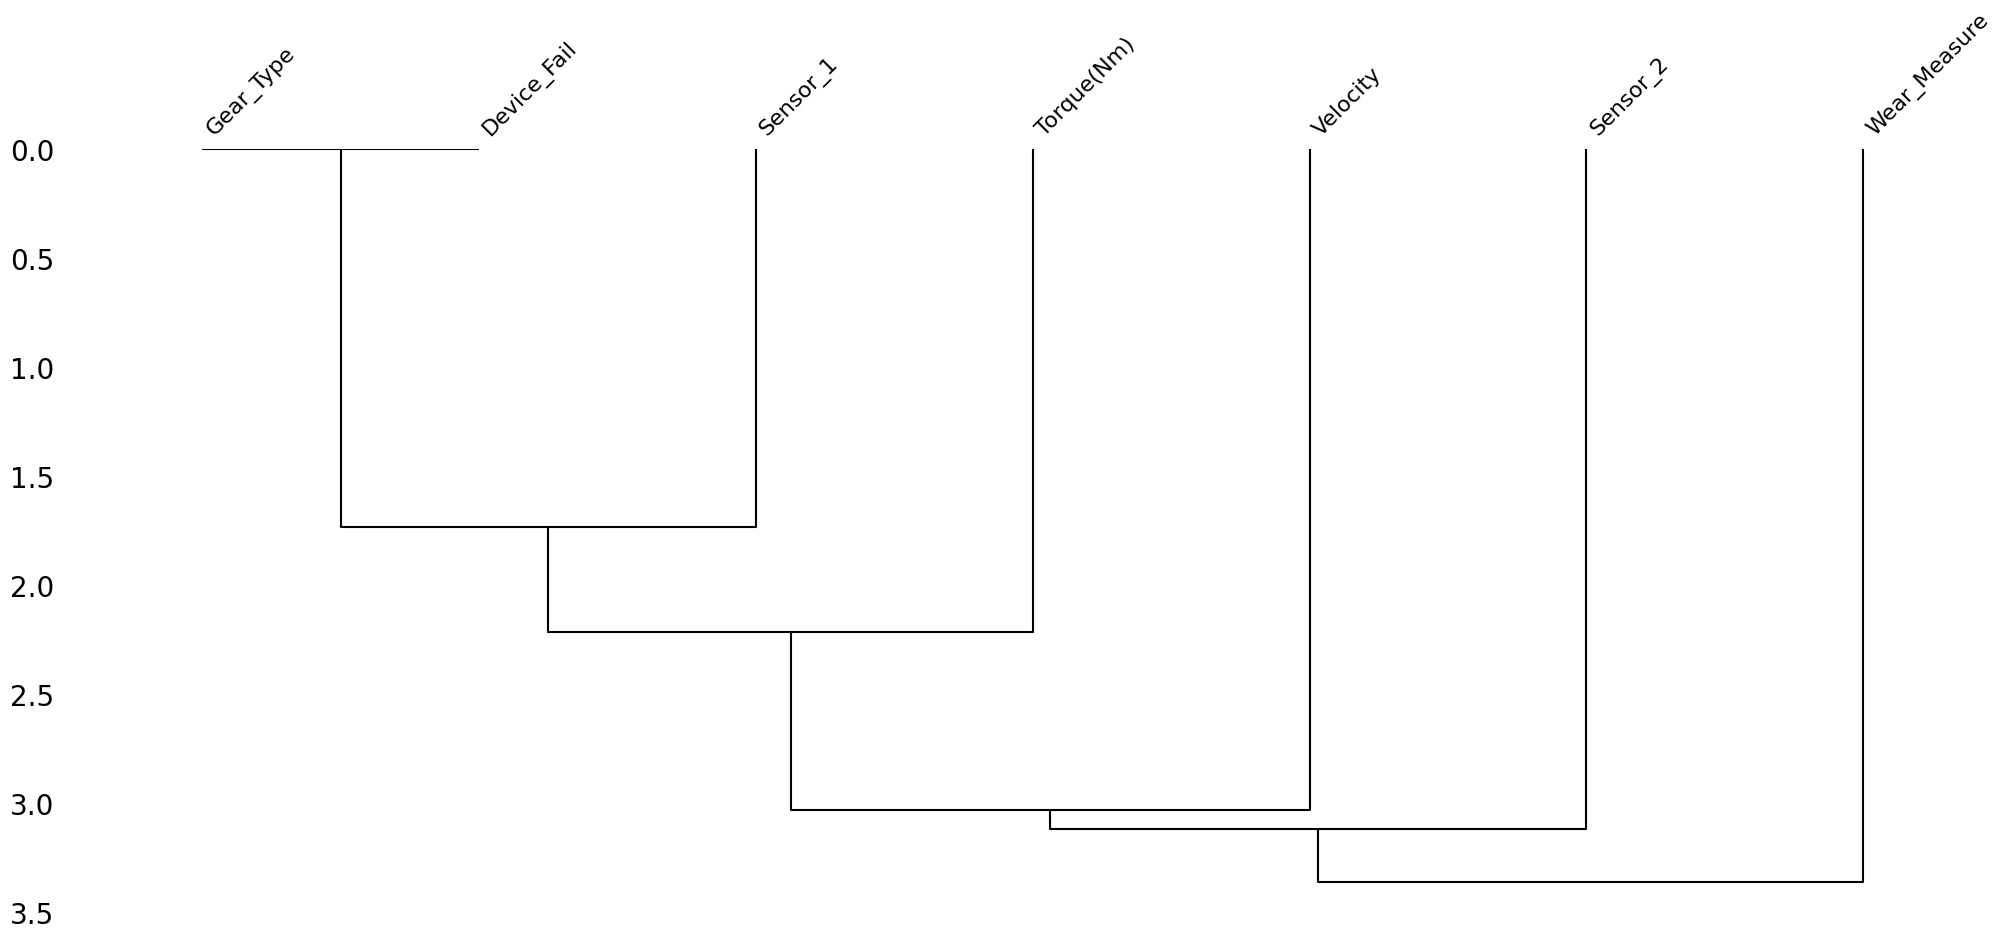

In [66]:
msno.dendrogram(data)

#msno.bar(data, sort = 'descending')

In [67]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

missing_value_df


,column_name,percent_missing
Device_Fail,Device_Fail,0.000
Gear_Type,Gear_Type,0.000
Velocity,Velocity,0.080
Torque(Nm),Torque(Nm),0.040
Wear_Measure,Wear_Measure,0.080
Sensor_1,Sensor_1,0.030
Sensor_2,Sensor_2,0.080


Replace missing values with median of each column

In [68]:
data[['Velocity','Torque(Nm)',"Wear_Measure","Sensor_1","Sensor_2"]] = data[['Velocity','Torque(Nm)',"Wear_Measure","Sensor_1","Sensor_2"]].fillna(data[['Velocity','Torque(Nm)',"Wear_Measure","Sensor_1","Sensor_2"]].median())



In [69]:
data.isnull().sum()

Device_Fail     0
Gear_Type       0
Velocity        0
Torque(Nm)      0
Wear_Measure    0
Sensor_1        0
Sensor_2        0
dtype: int64

missing values - fixed

#### Dropping the duplicate values

In [70]:
# checking for duplicate values
data.duplicated().sum()

0

###  Statistical summary of the data

In [71]:
data.describe(include = ['int','float']).T

,count,mean,std,min,25%,50%,75%,max
Velocity,10000.000,1538.676,179.426,674.000,1423.000,1503.000,1612.000,2886.000
Torque(Nm),10000.000,39.989,9.968,3.800,33.200,40.100,46.800,76.600
Wear_Measure,10000.000,108.007,63.595,0.000,53.000,108.000,162.000,253.000
Sensor_1,10000.000,300.006,2.000,295.300,298.300,300.100,301.500,304.500
Sensor_2,10000.000,328.951,5.493,313.000,324.481,329.296,333.000,343.000


Where mean values are equal to median values (50%). there are said to be of normal(gaussian distribution)

In [72]:
data.describe(include = 'object').T

,count,unique,top,freq
Device_Fail,10000,2,N,9661
Gear_Type,10000,4,Z,5163


## <a name='link1'>Data Exploration </a>

In [73]:
# User defined function to create barplots for categorical variable


def categorical_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=60, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.0f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [74]:
# User defined function to create histogram and boxplot for continuous variable

def continuous_histogram_boxplot(data, feature, figsize=(12, 9), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [75]:
# UDF
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [76]:
### UDF to plot distributions wrt response variable


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [77]:
list(data.columns)

['Device_Fail',
 'Gear_Type',
 'Velocity',
 'Torque(Nm)',
 'Wear_Measure',
 'Sensor_1',
 'Sensor_2']

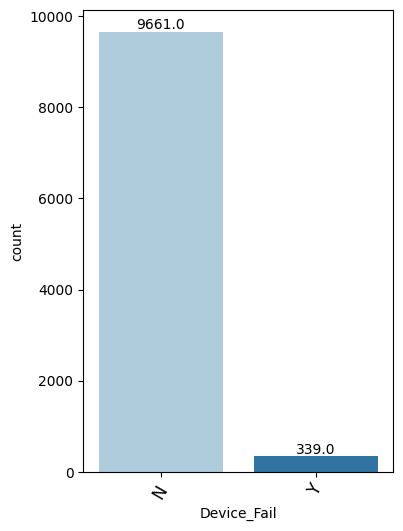

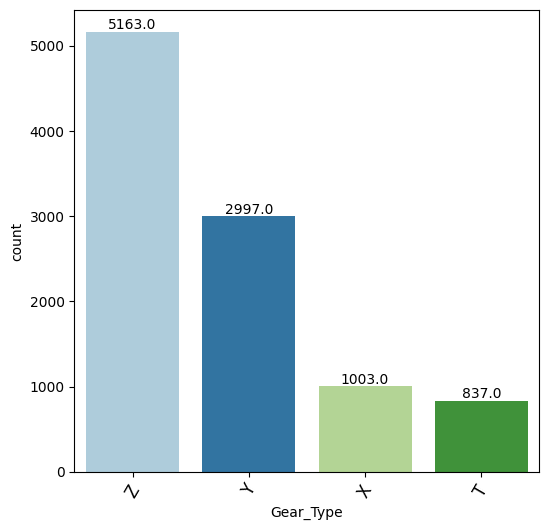

In [78]:
for col in data[['Device_Fail','Gear_Type']].columns:
    categorical_barplot(data, col)

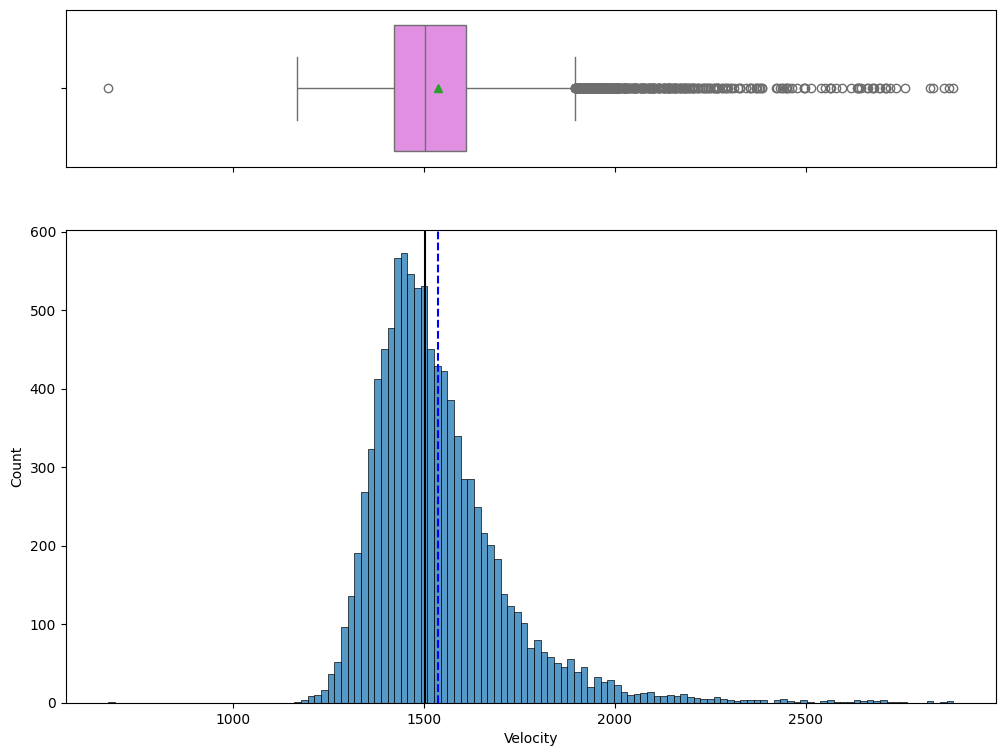

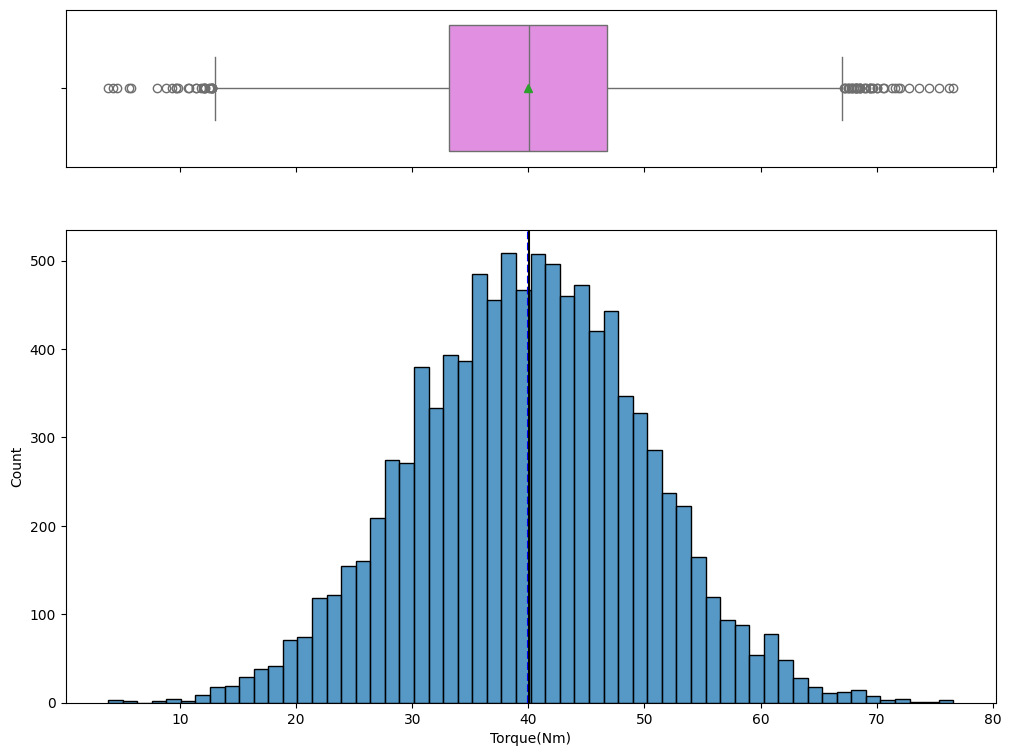

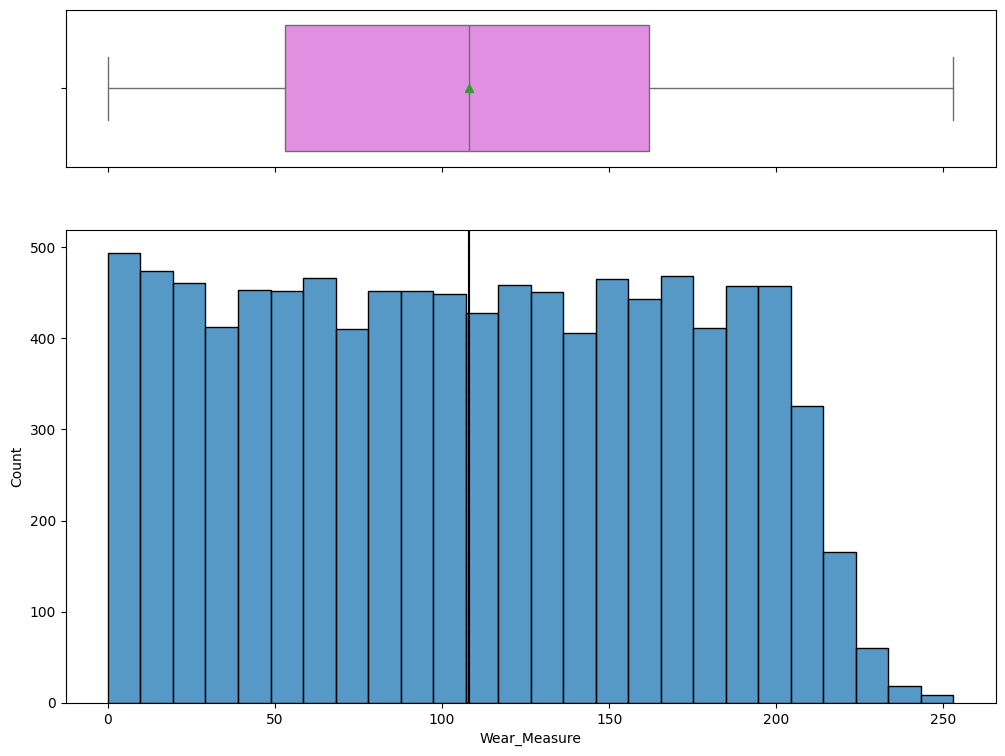

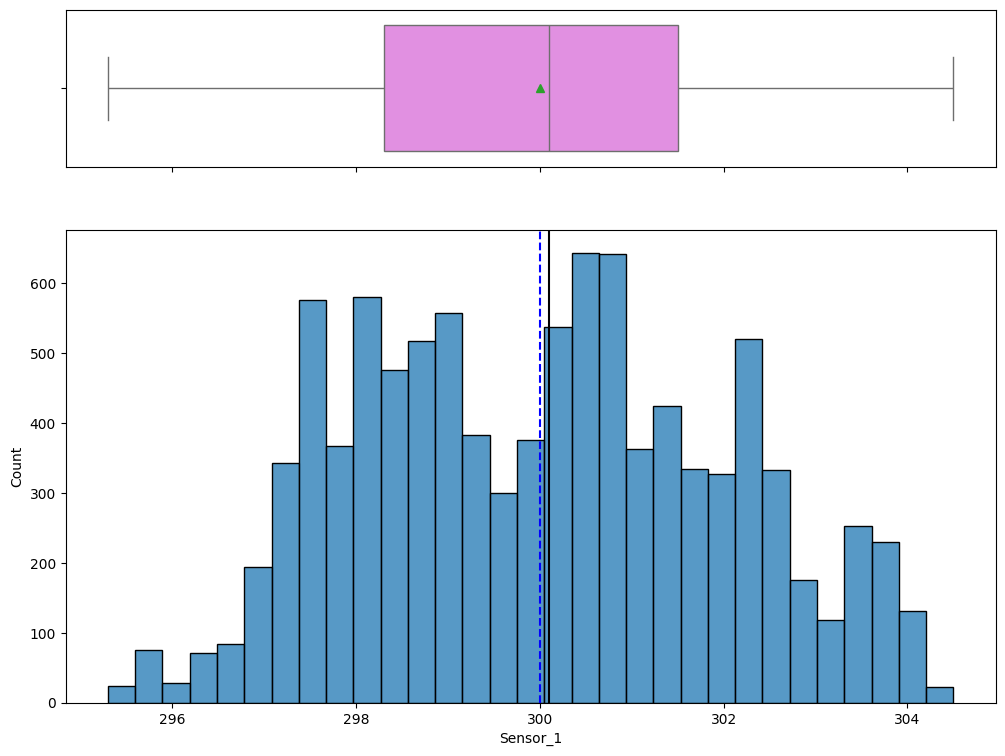

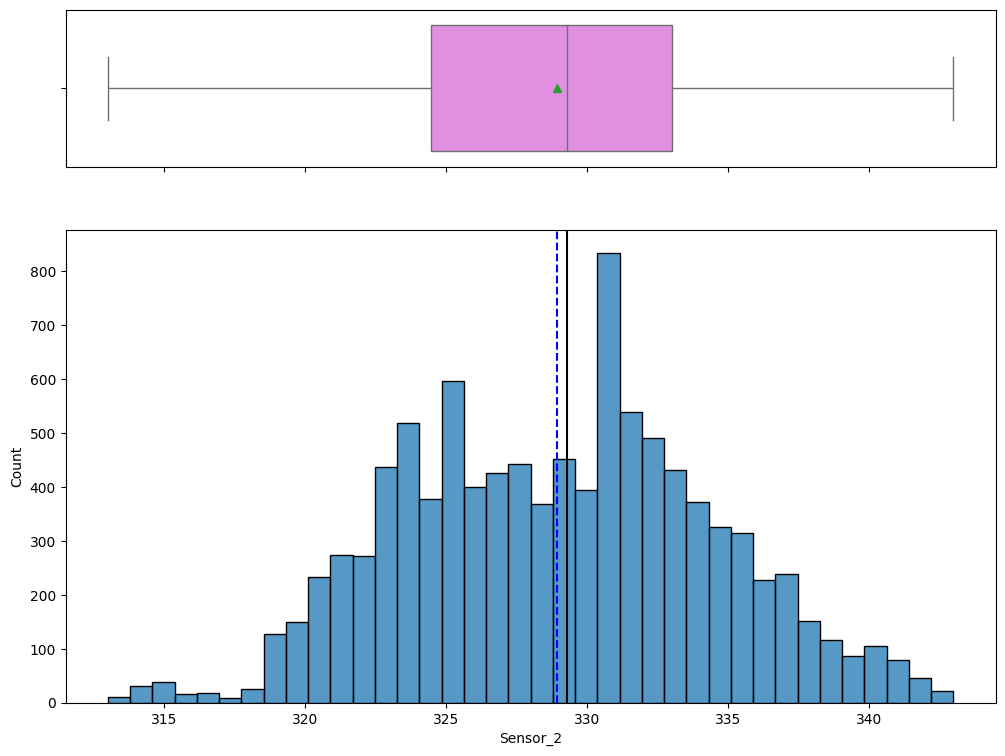

In [80]:
for col in data[['Velocity','Torque(Nm)','Wear_Measure','Sensor_1','Sensor_2']].columns:
    continuous_histogram_boxplot(data, col)

### Bivariate Analysis

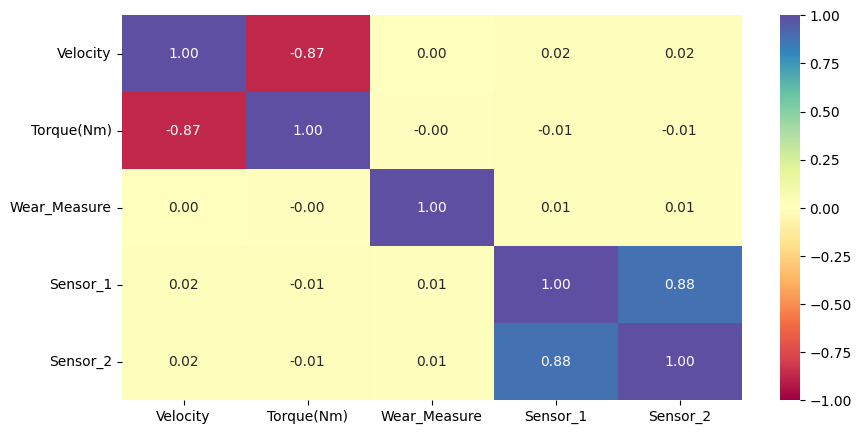

In [81]:


plt.figure(figsize=(10, 5))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Strong Positive orrelation between `Sensor_1` and `Sensor_2`.

Strong negative correlation between `Velocity` and `Torque`

- When modeling, the correlated attributes(multicollinearity) may make classical statistical models susceptible to `overfitting`

##### Let's see how the target variable varies across all 4 Gear types

Device_Fail     N    Y    All
Gear_Type                    
All          9661  339  10000
Z            4956  207   5163
Y            2914   83   2997
T             809   28    837
X             982   21   1003
------------------------------------------------------------------------------------------------------------------------


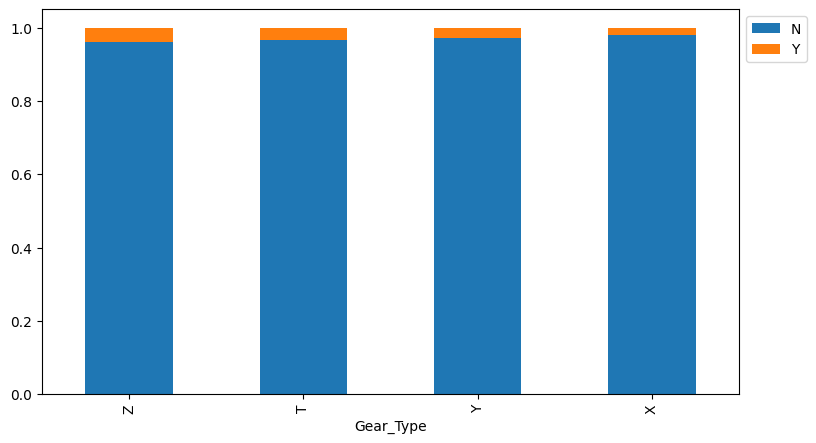

In [82]:
stacked_barplot(data, "Gear_Type", "Device_Fail")

##### Let's analyze the relation between `Sensor_1` and `Device_Fail`.

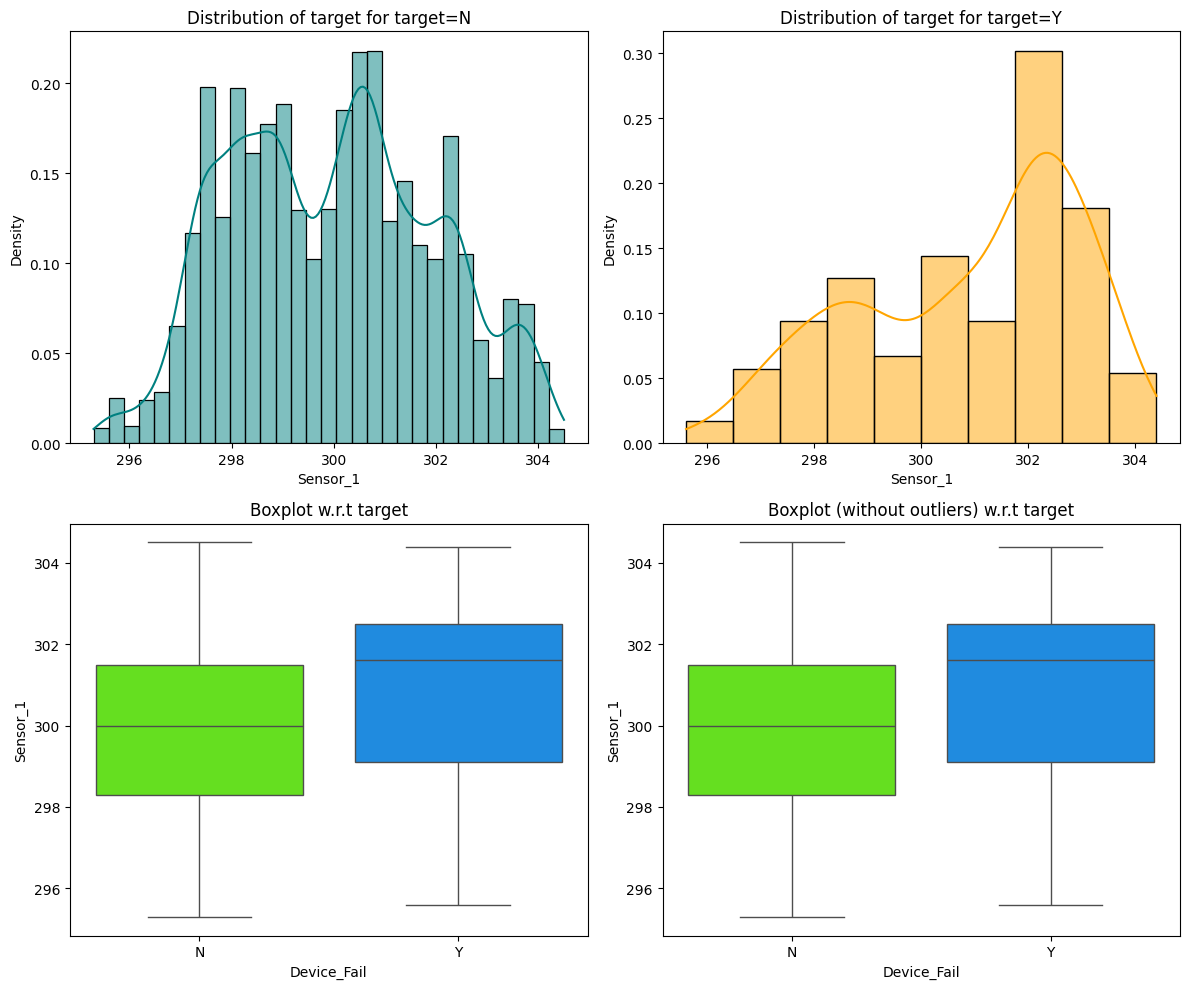

In [84]:
distribution_plot_wrt_target(data, "Sensor_1", "Device_Fail")

##### Let's analyze the relation between Sensor_1 and Device_Fail.

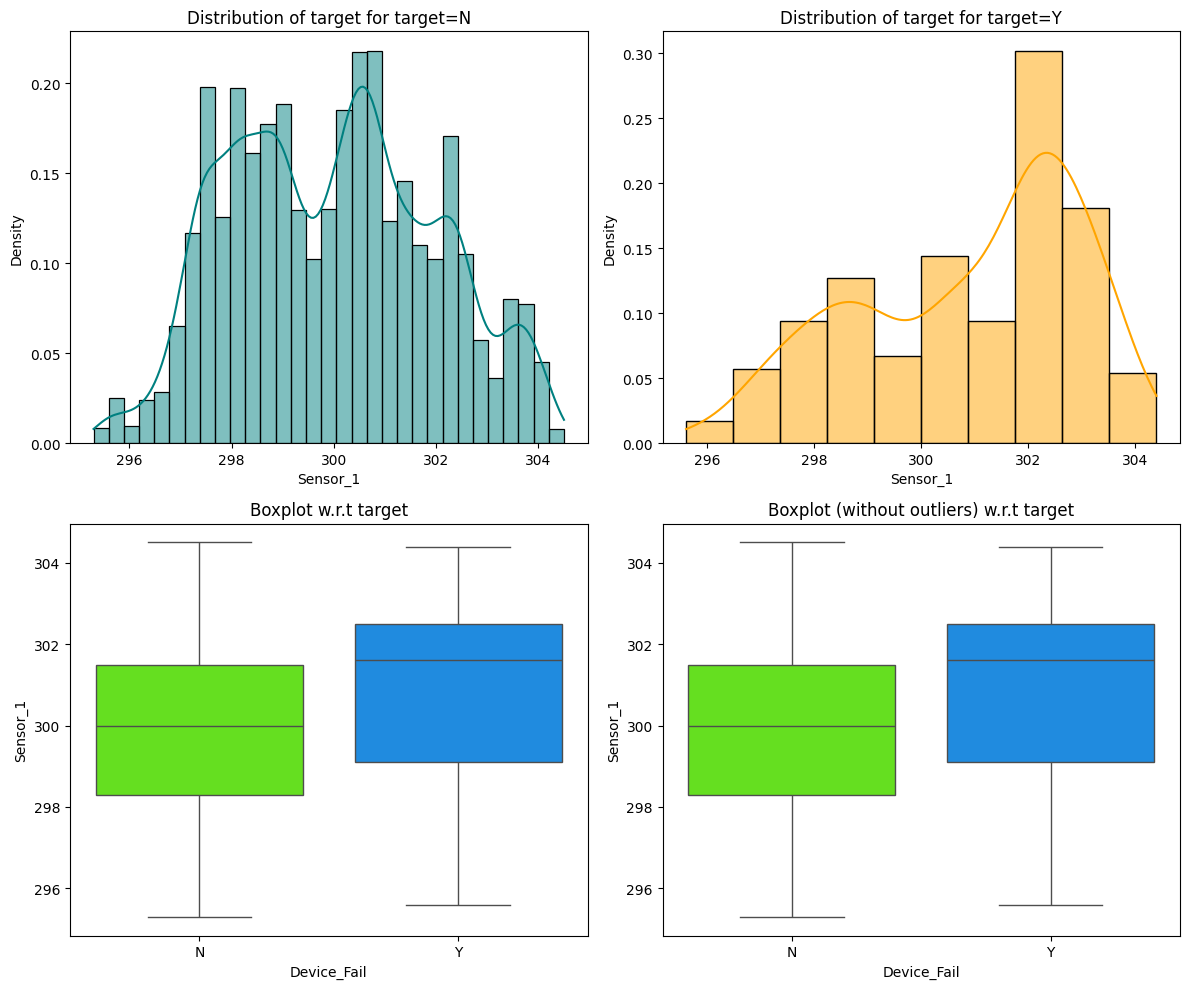

In [85]:
distribution_plot_wrt_target(data, "Sensor_1", "Device_Fail")

### Data Preprocessing

######Outlier Detection

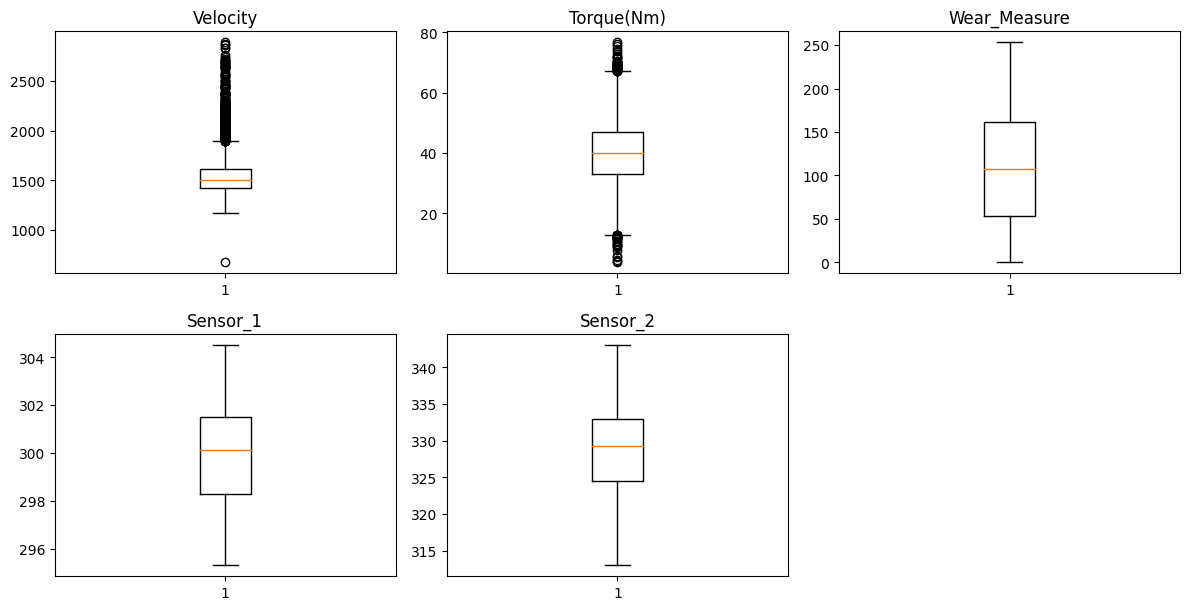

In [90]:
# outlier detection using boxplot
continuous_variables = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 9))

for i, variable in enumerate(continuous_variables):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()